# PROCESO DE JUNTAR LAS TABLAS EN UNA SOLA

In [186]:
import os
import pandas as pd

# Ruta base de la carpeta donde están los CSV
base_path = "/content/TABLA_GLOBAL"

# Listar los archivos CSV en la carpeta
csv_files = [f for f in os.listdir(base_path) if f.endswith('.csv')]

# Mostrar las primeras 5 filas de cada archivo
for csv_file in csv_files:
    file_path = os.path.join(base_path, csv_file)
    try:
        # Leer el archivo
        df = pd.read_csv(file_path)

        # Mostrar nombre del archivo y primeras filas
        print(f"\nArchivo: {csv_file}")
        print(df.head())  # Mostrar las primeras 5 filas
    except Exception as e:
        print(f"Error al procesar {csv_file}: {e}")


Error al procesar temperaturaMax_mensual_distrital.csv: 'utf-8' codec can't decode byte 0xd1 in position 150: invalid continuation byte

Archivo: 6variedades_distrital_mensual_anual.csv
    AÑO  MES  DEPARTAMENTO PROVINCIA                DISTRITO      PRODUCTO  \
0  2015    8      AMAZONAS      LUYA  SAN FRANCISCO DEL YESO        Huayro   
1  2015    2      AMAZONAS      LUYA                   LAMUD  Canchan-INIA   
2  2015    2      AMAZONAS      LUYA                   LAMUD        Yungay   
3  2015    2      AMAZONAS      LUYA          SANTA CATALINA        Huayro   
4  2015    3  HUANCAVELICA  HUAYTARA         HUAYACUNDO ARMA  Canchan-INIA   

   SIEMBRA  COSECHA  PRODUCCION  PRECIO_CHACRA  
0      0.0      7.0       136.5           0.87  
1      3.0      0.0         0.0           0.00  
2      0.0      0.0         0.0           0.00  
3     10.0      0.0         0.0           0.00  
4      0.0      4.0        41.7           0.60  

Archivo: ClasificacionClimatica_distrital.csv
  NO

In [187]:
# Leer archivos problemáticos con codificación alternativa
problematic_files = [
    "temperaturaMax_mensual_distrital.csv",
    "Temp_min-mensual-distritos.csv"
]

for file in problematic_files:
    file_path = os.path.join(base_path, file)
    try:
        df = pd.read_csv(file_path, encoding="latin1")
        print(f"\nArchivo {file} leído correctamente.")
        print(df.head())
    except Exception as e:
        print(f"Error al procesar {file}: {e}")



Archivo temperaturaMax_mensual_distrital.csv leído correctamente.
    NOMBDEP NOMBPROV  NOMBDIST   INVIERNO       MAYO     AGOSTO    OCTUBRE  \
0  AMAZONAS    BAGUA  ARAMANGO  26.863174  27.111162  26.810782  28.228055   
1  AMAZONAS    BAGUA     BAGUA  30.520419  30.209566  30.530455  31.899539   
2  AMAZONAS    BAGUA  COPALLIN  26.640124  26.692143  26.566268  28.179436   
3  AMAZONAS    BAGUA  EL PARCO  30.007970  29.989424  30.010680  31.877391   
4  AMAZONAS    BAGUA     IMAZA  26.780580  27.356814  26.749295  27.947892   

       MARZO  DICIEMBRE      ENERO  SEPTIEMBRE     VERANO      JUNIO  \
0  27.505999  28.109687  27.076085   27.614823  27.140192  26.405174   
1  30.830805  31.484104  30.873373   31.548531  30.779754  29.663877   
2  26.824876  27.838548  26.916340   27.506804  26.790089  26.232811   
3  30.163648  31.613463  30.324965   31.386001  30.174626  29.754390   
4  27.826918  28.076469  27.759810   27.465628  27.711762  26.552791   

   NOVIEMBRE      ABRIL    FEBR

In [188]:
def transform_to_long(file_path, id_vars, value_vars, value_name):
    # Leer archivo
    df = pd.read_csv(file_path, encoding="latin1")
    # Cambiar nombres de columnas (si es necesario)
    df.rename(columns={"setiembre": "septiembre"}, inplace=True)
    # Transformar a formato largo
    df_long = pd.melt(df, id_vars=id_vars, value_vars=value_vars,
                      var_name="MES", value_name=value_name)
    return df_long

# Archivo Temp_min-mensual-distritos.csv
temp_min_path = os.path.join(base_path, "Temp_min-mensual-distritos.csv")
id_vars = ['NOMBDEP', 'NOMBPROV', 'NOMBDIST']
value_vars = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio',
              'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
temp_min_long = transform_to_long(temp_min_path, id_vars, value_vars, "TEMP_MIN")
print(temp_min_long.head())


    NOMBDEP NOMBPROV  NOMBDIST    MES   TEMP_MIN
0  AMAZONAS    BAGUA  ARAMANGO  enero  16.459685
1  AMAZONAS    BAGUA     BAGUA  enero  19.670997
2  AMAZONAS    BAGUA  COPALLIN  enero  16.379788
3  AMAZONAS    BAGUA  EL PARCO  enero  19.980193
4  AMAZONAS    BAGUA     IMAZA  enero  18.321999


In [189]:
# Inspeccionar valores nulos
for csv_file in csv_files:
    file_path = os.path.join(base_path, csv_file)
    try:
        df = pd.read_csv(file_path, encoding="latin1")
        print(f"\nArchivo: {csv_file}")
        print("Valores nulos por columna:")
        print(df.isnull().sum())
    except Exception as e:
        print(f"Error al procesar {csv_file}: {e}")



Archivo: temperaturaMax_mensual_distrital.csv
Valores nulos por columna:
NOMBDEP       0
NOMBPROV      0
NOMBDIST      0
INVIERNO      0
MAYO          0
AGOSTO        0
OCTUBRE       0
MARZO         0
DICIEMBRE     0
ENERO         0
SEPTIEMBRE    0
VERANO        0
JUNIO         0
NOVIEMBRE     0
ABRIL         0
FEBRERO       0
ANUAL         0
JULIO         0
PRIMAVERA     0
OTOÑO         0
dtype: int64

Archivo: 6variedades_distrital_mensual_anual.csv
Valores nulos por columna:
AÃO             0
MES              0
DEPARTAMENTO     0
PROVINCIA        0
DISTRITO         0
PRODUCTO         0
SIEMBRA          0
COSECHA          0
PRODUCCION       0
PRECIO_CHACRA    0
dtype: int64

Archivo: ClasificacionClimatica_distrital.csv
Valores nulos por columna:
NOMBDEP                    1
NOMBPROV                   1
NOMBDIST                   1
Clasificacion_Climatica    1
dtype: int64

Archivo: Variedad_a_Caracteristicas.csv
Valores nulos por columna:
ï»¿Variety;Late blight (LB);Predominant tu

In [190]:
# Ejemplo de replicar filas para datos anuales
def expand_to_months(df, id_vars, value_var):
    # Crear una columna de meses (1-12)
    months = pd.DataFrame({'MES': range(1, 13)})
    df_expanded = df.merge(months, how='cross')
    return df_expanded

# Archivo tizon_distrital_noMensual_noAnual.csv
tizon_path = os.path.join(base_path, "tizon_distrital_noMensual_noAnual.csv")
tizon_df = pd.read_csv(tizon_path, encoding="latin1")
tizon_expanded = expand_to_months(tizon_df, ['Departamento', 'Provincia', 'Distrito'], 'Promedio_Ponderado')
print(tizon_expanded.head())


  Departamento  Provincia  Distrito  Promedio_Ponderado  MES
0    CAJAMARCA  CONTUMAZA  GUZMANGO           68.171875    1
1    CAJAMARCA  CONTUMAZA  GUZMANGO           68.171875    2
2    CAJAMARCA  CONTUMAZA  GUZMANGO           68.171875    3
3    CAJAMARCA  CONTUMAZA  GUZMANGO           68.171875    4
4    CAJAMARCA  CONTUMAZA  GUZMANGO           68.171875    5


In [191]:
def transform_to_long(df, id_vars, value_vars, value_name):
    df_long = pd.melt(df, id_vars=id_vars, value_vars=value_vars,
                      var_name="MES", value_name=value_name)
    return df_long

# Ejemplo para temperatura máxima
temp_max_path = "/content/TABLA_GLOBAL/temperaturaMax_mensual_distrital.csv"
temp_max_df = pd.read_csv(temp_max_path, encoding="latin1")
value_vars = ['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO',
              'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE']
temp_max_long = transform_to_long(temp_max_df, ['NOMBDEP', 'NOMBPROV', 'NOMBDIST'], value_vars, "TEMP_MAX")
print(temp_max_long.head())


    NOMBDEP NOMBPROV  NOMBDIST    MES   TEMP_MAX
0  AMAZONAS    BAGUA  ARAMANGO  ENERO  27.076085
1  AMAZONAS    BAGUA     BAGUA  ENERO  30.873373
2  AMAZONAS    BAGUA  COPALLIN  ENERO  26.916340
3  AMAZONAS    BAGUA  EL PARCO  ENERO  30.324965
4  AMAZONAS    BAGUA     IMAZA  ENERO  27.759810


In [192]:
def expand_to_months(df, id_vars, value_var):
    months = pd.DataFrame({'MES': range(1, 13)})  # Crear meses 1-12
    df_expanded = df.merge(months, how='cross')
    return df_expanded

# Ejemplo para tizon
tizon_path = "/content/TABLA_GLOBAL/tizon_distrital_noMensual_noAnual.csv"
tizon_df = pd.read_csv(tizon_path, encoding="latin1")
tizon_expanded = expand_to_months(tizon_df, ['Departamento', 'Provincia', 'Distrito'], 'Promedio_Ponderado')
print(tizon_expanded.head())


  Departamento  Provincia  Distrito  Promedio_Ponderado  MES
0    CAJAMARCA  CONTUMAZA  GUZMANGO           68.171875    1
1    CAJAMARCA  CONTUMAZA  GUZMANGO           68.171875    2
2    CAJAMARCA  CONTUMAZA  GUZMANGO           68.171875    3
3    CAJAMARCA  CONTUMAZA  GUZMANGO           68.171875    4
4    CAJAMARCA  CONTUMAZA  GUZMANGO           68.171875    5


In [193]:
clima_path = "/content/TABLA_GLOBAL/ClasificacionClimatica_distrital.csv"
clima_df = pd.read_csv(clima_path, encoding="latin1")

# Rellenar nulos con una categoría "Desconocido" (opcional)
clima_df.fillna("Desconocido", inplace=True)
print(clima_df.isnull().sum())


NOMBDEP                    0
NOMBPROV                   0
NOMBDIST                   0
Clasificacion_Climatica    0
dtype: int64


In [194]:
# Archivo de temperatura máxima (ya transformado a formato largo previamente en este caso)
temp_max_long_path = "/content/TABLA_GLOBAL/temperaturaMax_mensual_distrital.csv"
temp_max_df = pd.read_csv(temp_max_long_path, encoding="latin1")

# Archivo de Clasificación Climática
clima_path = "/content/TABLA_GLOBAL/ClasificacionClimatica_distrital.csv"
clima_df = pd.read_csv(clima_path, encoding="latin1")

# Transformación de TEMP_MAX al formato largo
value_vars = ['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO',
              'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE']
temp_max_long = pd.melt(temp_max_df,
                        id_vars=['NOMBDEP', 'NOMBPROV', 'NOMBDIST'],
                        value_vars=value_vars,
                        var_name="MES",
                        value_name="TEMP_MAX")

# Unión de TEMP_MAX y Clasificación Climática
tabla_base = temp_max_long.merge(clima_df,
                                 how='left',
                                 left_on=['NOMBDEP', 'NOMBPROV', 'NOMBDIST'],
                                 right_on=['NOMBDEP', 'NOMBPROV', 'NOMBDIST'])

# Archivo de Tizón
tizon_path = "/content/TABLA_GLOBAL/tizon_distrital_noMensual_noAnual.csv"
tizon_df = pd.read_csv(tizon_path, encoding="latin1")

# Expansión de datos de Tizón para incluir meses
months = pd.DataFrame({'MES': ['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO',
                               'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE']})
tizon_expanded = tizon_df.merge(months, how='cross')

# Unión de Tizón con la Tabla Base
tabla_base = tabla_base.merge(tizon_expanded,
                              how='left',
                              left_on=['NOMBDEP', 'NOMBPROV', 'NOMBDIST', 'MES'],
                              right_on=['Departamento', 'Provincia', 'Distrito', 'MES'])

# Limpieza de columnas no necesarias
tabla_base.drop(columns=['Departamento', 'Provincia', 'Distrito'], inplace=True)

# Verificar la tabla resultante
tabla_base


,NOMBDEP,NOMBPROV,NOMBDIST,MES,TEMP_MAX,Clasificacion_Climatica,Promedio_Ponderado
0,AMAZONAS,BAGUA,ARAMANGO,ENERO,27.076085,Lluvioso con humedad abundante todas las estac...,0.000000
1,AMAZONAS,BAGUA,BAGUA,ENERO,30.873373,Semiseco con humedad abundante todas las estac...,15.945946
2,AMAZONAS,BAGUA,COPALLIN,ENERO,26.916340,Semiseco con humedad abundante todas las estac...,2.335443
3,AMAZONAS,BAGUA,EL PARCO,ENERO,30.324965,Semiseco con humedad abundante todas las estac...,0.000000
4,AMAZONAS,BAGUA,IMAZA,ENERO,27.759810,Lluvioso con humedad abundante todas las estac...,0.077615
...,...,...,...,...,...,...,...
22483,UCAYALI,PADRE ABAD,CURIMANA,DICIEMBRE,31.235136,Lluvioso con humedad abundante todas las estac...,0.000000
22484,UCAYALI,PADRE ABAD,IRAZOLA,DICIEMBRE,30.333002,Lluvioso con humedad abundante todas las estac...,0.000000
22485,UCAYALI,PADRE ABAD,NESHUYA,DICIEMBRE,31.858374,Lluvioso con humedad abundante todas las estac...,0.000000
22486,UCAYALI,PADRE ABAD,PADRE ABAD,DICIEMBRE,28.494550,Lluvioso con humedad abundante todas las estac...,0.000000


In [195]:
# Renombrar la columna Promedio_Ponderado a TIZON_PROMEDIO
tabla_base.rename(columns={"Promedio_Ponderado": "TIZON_PROMEDIO"}, inplace=True)

# Verificar la tabla actualizada
print(tabla_base.head())


    NOMBDEP NOMBPROV  NOMBDIST    MES   TEMP_MAX  \
0  AMAZONAS    BAGUA  ARAMANGO  ENERO  27.076085   
1  AMAZONAS    BAGUA     BAGUA  ENERO  30.873373   
2  AMAZONAS    BAGUA  COPALLIN  ENERO  26.916340   
3  AMAZONAS    BAGUA  EL PARCO  ENERO  30.324965   
4  AMAZONAS    BAGUA     IMAZA  ENERO  27.759810   

                             Clasificacion_Climatica  TIZON_PROMEDIO  
0  Lluvioso con humedad abundante todas las estac...        0.000000  
1  Semiseco con humedad abundante todas las estac...       15.945946  
2  Semiseco con humedad abundante todas las estac...        2.335443  
3  Semiseco con humedad abundante todas las estac...        0.000000  
4  Lluvioso con humedad abundante todas las estac...        0.077615  


In [196]:
# Verificar si (NOMBDEP, NOMBPROV, NOMBDIST) es único
is_unique = tabla_base.duplicated(subset=['NOMBDEP', 'NOMBPROV', 'NOMBDIST', 'MES'], keep=False)
duplicates = tabla_base[is_unique]

# Mostrar cuántos duplicados hay y un ejemplo
print(f"Total de duplicados: {duplicates.shape[0]}")
print("Ejemplo de duplicados:")
print(duplicates.head())

# Exportar duplicados para inspección más detallada (opcional)
duplicates.to_csv("/content/duplicados.csv", index=False)


Total de duplicados: 0
Ejemplo de duplicados:
Empty DataFrame
Columns: [NOMBDEP, NOMBPROV, NOMBDIST, MES, TEMP_MAX, Clasificacion_Climatica, TIZON_PROMEDIO]
Index: []


In [197]:
# Leer el archivo de temperatura mínima
temp_min_path = "/content/TABLA_GLOBAL/Temp_min-mensual-distritos.csv"
temp_min_df = pd.read_csv(temp_min_path, encoding="latin1")

# Renombrar columnas para unificar nombres de meses
month_mapping = {
    'enero': 'ENERO', 'febrero': 'FEBRERO', 'marzo': 'MARZO', 'abril': 'ABRIL',
    'mayo': 'MAYO', 'junio': 'JUNIO', 'julio': 'JULIO', 'agosto': 'AGOSTO',
    'setiembre': 'SEPTIEMBRE', 'septiembre': 'SEPTIEMBRE', 'octubre': 'OCTUBRE',
    'noviembre': 'NOVIEMBRE', 'diciembre': 'DICIEMBRE'
}

temp_min_df.rename(columns=month_mapping, inplace=True)

# Transformar al formato largo
value_vars = ['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO',
              'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE']
temp_min_long = pd.melt(temp_min_df,
                        id_vars=['NOMBDEP', 'NOMBPROV', 'NOMBDIST'],
                        value_vars=value_vars,
                        var_name="MES",
                        value_name="TEMP_MIN")

temp_min_long


,NOMBDEP,NOMBPROV,NOMBDIST,MES,TEMP_MIN
0,AMAZONAS,BAGUA,ARAMANGO,ENERO,16.459685
1,AMAZONAS,BAGUA,BAGUA,ENERO,19.670997
2,AMAZONAS,BAGUA,COPALLIN,ENERO,16.379788
3,AMAZONAS,BAGUA,EL PARCO,ENERO,19.980193
4,AMAZONAS,BAGUA,IMAZA,ENERO,18.321999
...,...,...,...,...,...
22483,UCAYALI,PADRE ABAD,CURIMANA,DICIEMBRE,21.994663
22484,UCAYALI,PADRE ABAD,IRAZOLA,DICIEMBRE,21.780076
22485,UCAYALI,PADRE ABAD,NESHUYA,DICIEMBRE,22.000000
22486,UCAYALI,PADRE ABAD,PADRE ABAD,DICIEMBRE,19.685969


In [198]:
# Unir TEMP_MIN con la tabla base
tabla_base = tabla_base.merge(temp_min_long,
                              how='left',
                              on=['NOMBDEP', 'NOMBPROV', 'NOMBDIST', 'MES'])

# Verificar la tabla actualizada
tabla_base

,NOMBDEP,NOMBPROV,NOMBDIST,MES,TEMP_MAX,Clasificacion_Climatica,TIZON_PROMEDIO,TEMP_MIN
0,AMAZONAS,BAGUA,ARAMANGO,ENERO,27.076085,Lluvioso con humedad abundante todas las estac...,0.000000,16.459685
1,AMAZONAS,BAGUA,BAGUA,ENERO,30.873373,Semiseco con humedad abundante todas las estac...,15.945946,19.670997
2,AMAZONAS,BAGUA,COPALLIN,ENERO,26.916340,Semiseco con humedad abundante todas las estac...,2.335443,16.379788
3,AMAZONAS,BAGUA,EL PARCO,ENERO,30.324965,Semiseco con humedad abundante todas las estac...,0.000000,19.980193
4,AMAZONAS,BAGUA,IMAZA,ENERO,27.759810,Lluvioso con humedad abundante todas las estac...,0.077615,18.321999
...,...,...,...,...,...,...,...,...
22483,UCAYALI,PADRE ABAD,CURIMANA,DICIEMBRE,31.235136,Lluvioso con humedad abundante todas las estac...,0.000000,21.994663
22484,UCAYALI,PADRE ABAD,IRAZOLA,DICIEMBRE,30.333002,Lluvioso con humedad abundante todas las estac...,0.000000,21.780076
22485,UCAYALI,PADRE ABAD,NESHUYA,DICIEMBRE,31.858374,Lluvioso con humedad abundante todas las estac...,0.000000,22.000000
22486,UCAYALI,PADRE ABAD,PADRE ABAD,DICIEMBRE,28.494550,Lluvioso con humedad abundante todas las estac...,0.000000,19.685969


In [199]:
# Leer el archivo de precipitación mensual
precipitacion_path = "/content/TABLA_GLOBAL/Precipitacion_mensual_distrital_noAnual.csv"
precipitacion_df = pd.read_csv(precipitacion_path, encoding="latin1")

# Renombrar columnas de meses para unificar
precipitacion_df.rename(columns=month_mapping, inplace=True)

# Transformar al formato largo
precipitacion_long = pd.melt(precipitacion_df,
                             id_vars=['NOMBDEP', 'NOMBPROV', 'NOMBDIST'],
                             value_vars=value_vars,
                             var_name="MES",
                             value_name="PRECIPITACION")

# Unir PRECIPITACION con la tabla base
tabla_base = tabla_base.merge(precipitacion_long,
                              how='left',
                              on=['NOMBDEP', 'NOMBPROV', 'NOMBDIST', 'MES'])

# Verificar la tabla actualizada
tabla_base

,NOMBDEP,NOMBPROV,NOMBDIST,MES,TEMP_MAX,Clasificacion_Climatica,TIZON_PROMEDIO,TEMP_MIN,PRECIPITACION
0,AMAZONAS,BAGUA,ARAMANGO,ENERO,27.076085,Lluvioso con humedad abundante todas las estac...,0.000000,16.459685,129.894485
1,AMAZONAS,BAGUA,BAGUA,ENERO,30.873373,Semiseco con humedad abundante todas las estac...,15.945946,19.670997,55.416202
2,AMAZONAS,BAGUA,COPALLIN,ENERO,26.916340,Semiseco con humedad abundante todas las estac...,2.335443,16.379788,73.479792
3,AMAZONAS,BAGUA,EL PARCO,ENERO,30.324965,Semiseco con humedad abundante todas las estac...,0.000000,19.980193,59.510244
4,AMAZONAS,BAGUA,IMAZA,ENERO,27.759810,Lluvioso con humedad abundante todas las estac...,0.077615,18.321999,311.072020
...,...,...,...,...,...,...,...,...,...
22483,UCAYALI,PADRE ABAD,CURIMANA,DICIEMBRE,31.235136,Lluvioso con humedad abundante todas las estac...,0.000000,21.994663,303.789348
22484,UCAYALI,PADRE ABAD,IRAZOLA,DICIEMBRE,30.333002,Lluvioso con humedad abundante todas las estac...,0.000000,21.780076,407.883075
22485,UCAYALI,PADRE ABAD,NESHUYA,DICIEMBRE,31.858374,Lluvioso con humedad abundante todas las estac...,0.000000,22.000000,248.436134
22486,UCAYALI,PADRE ABAD,PADRE ABAD,DICIEMBRE,28.494550,Lluvioso con humedad abundante todas las estac...,0.000000,19.685969,626.462697


In [200]:
# Guardar la tabla consolidada en un archivo CSV
output_path = "/content/tabla_consolidada_v2.csv"
tabla_base.to_csv(output_path, index=False, encoding="latin1")

# Confirmar el guardado
print(f"Tabla consolidada actualizada guardada en: {output_path}")


Tabla consolidada actualizada guardada en: /content/tabla_consolidada_v2.csv


In [201]:
# Leer el archivo de nevada mensual
nevada_path = "/content/TABLA_GLOBAL/nevada_distrital_mensual_noAnual.csv"
nevada_df = pd.read_csv(nevada_path, encoding="latin1")

# Renombrar columnas para unificar nombres de meses
month_mapping = {
    'Enero': 'ENERO', 'Febrero': 'FEBRERO', 'Marzo': 'MARZO', 'Abril': 'ABRIL',
    'Mayo': 'MAYO', 'Junio': 'JUNIO', 'Julio': 'JULIO', 'Agosto': 'AGOSTO',
    'Setiembre': 'SEPTIEMBRE', 'Septiembre': 'SEPTIEMBRE', 'Octubre': 'OCTUBRE',
    'Noviembre': 'NOVIEMBRE', 'Diciembre': 'DICIEMBRE'
}

nevada_df.rename(columns=month_mapping, inplace=True)

# Transformar al formato largo
value_vars = ['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO',
              'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE']
nevada_long = pd.melt(nevada_df,
                      id_vars=['UBIGEO', 'NOMBDEP', 'NOMBPROV', 'NOMBDIST'],
                      value_vars=value_vars,
                      var_name="MES",
                      value_name="NEVADA")

# Unir NEVADA con la tabla base
tabla_base = tabla_base.merge(nevada_long,
                              how='left',
                              on=['NOMBDEP', 'NOMBPROV', 'NOMBDIST', 'MES'])

# Verificar la tabla actualizada
print(tabla_base.head())


    NOMBDEP NOMBPROV  NOMBDIST    MES   TEMP_MAX  \
0  AMAZONAS    BAGUA  ARAMANGO  ENERO  27.076085   
1  AMAZONAS    BAGUA     BAGUA  ENERO  30.873373   
2  AMAZONAS    BAGUA  COPALLIN  ENERO  26.916340   
3  AMAZONAS    BAGUA  EL PARCO  ENERO  30.324965   
4  AMAZONAS    BAGUA     IMAZA  ENERO  27.759810   

                             Clasificacion_Climatica  TIZON_PROMEDIO  \
0  Lluvioso con humedad abundante todas las estac...        0.000000   
1  Semiseco con humedad abundante todas las estac...       15.945946   
2  Semiseco con humedad abundante todas las estac...        2.335443   
3  Semiseco con humedad abundante todas las estac...        0.000000   
4  Lluvioso con humedad abundante todas las estac...        0.077615   

    TEMP_MIN  PRECIPITACION  UBIGEO  NEVADA  
0  16.459685     129.894485   10202     0.0  
1  19.670997      55.416202   10201     0.0  
2  16.379788      73.479792   10203     0.0  
3  19.980193      59.510244   10204     0.0  
4  18.321999     311.072

In [202]:
# Leer el archivo de erosión
erosion_path = "/content/TABLA_GLOBAL/erosion_distrital_noMensual_NoAnual.csv"
erosion_df = pd.read_csv(erosion_path, encoding="latin1")

# Crear una lista de meses
months = ['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO',
          'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE']

# Replicar los datos para todos los meses
erosion_expanded = erosion_df.merge(pd.DataFrame({'MES': months}), how='cross')

# Unir EROSION_PROMEDIO con la tabla base
tabla_base = tabla_base.merge(erosion_expanded,
                              how='left',
                              left_on=['NOMBDEP', 'NOMBPROV', 'NOMBDIST', 'MES'],
                              right_on=['DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'MES'])

# Eliminar columnas innecesarias después de la unión
tabla_base.drop(columns=['DEPARTAMENTO', 'PROVINCIA', 'DISTRITO'], inplace=True)

# Verificar la tabla actualizada
tabla_base

,NOMBDEP,NOMBPROV,NOMBDIST,MES,TEMP_MAX,Clasificacion_Climatica,TIZON_PROMEDIO,TEMP_MIN,PRECIPITACION,UBIGEO,NEVADA,EROSION_PROMEDIO
0,AMAZONAS,BAGUA,ARAMANGO,ENERO,27.076085,Lluvioso con humedad abundante todas las estac...,0.000000,16.459685,129.894485,10202,0.0,15.131108
1,AMAZONAS,BAGUA,BAGUA,ENERO,30.873373,Semiseco con humedad abundante todas las estac...,15.945946,19.670997,55.416202,10201,0.0,23.318603
2,AMAZONAS,BAGUA,COPALLIN,ENERO,26.916340,Semiseco con humedad abundante todas las estac...,2.335443,16.379788,73.479792,10203,0.0,12.791936
3,AMAZONAS,BAGUA,EL PARCO,ENERO,30.324965,Semiseco con humedad abundante todas las estac...,0.000000,19.980193,59.510244,10204,0.0,12.397214
4,AMAZONAS,BAGUA,IMAZA,ENERO,27.759810,Lluvioso con humedad abundante todas las estac...,0.077615,18.321999,311.072020,10205,0.0,4.367886
...,...,...,...,...,...,...,...,...,...,...,...,...
22483,UCAYALI,PADRE ABAD,CURIMANA,DICIEMBRE,31.235136,Lluvioso con humedad abundante todas las estac...,0.000000,21.994663,303.789348,250303,0.0,0.456189
22484,UCAYALI,PADRE ABAD,IRAZOLA,DICIEMBRE,30.333002,Lluvioso con humedad abundante todas las estac...,0.000000,21.780076,407.883075,250302,0.0,1.088604
22485,UCAYALI,PADRE ABAD,NESHUYA,DICIEMBRE,31.858374,Lluvioso con humedad abundante todas las estac...,0.000000,22.000000,248.436134,250304,0.0,1.414686
22486,UCAYALI,PADRE ABAD,PADRE ABAD,DICIEMBRE,28.494550,Lluvioso con humedad abundante todas las estac...,0.000000,19.685969,626.462697,250301,0.0,7.460539


In [203]:
# Guardar la tabla consolidada actualizada
output_path = "/content/tabla_consolidada_v5.csv"
tabla_base.to_csv(output_path, index=False, encoding="latin1")

# Confirmar el guardado
print(f"Tabla consolidada actualizada guardada en: {output_path}")


Tabla consolidada actualizada guardada en: /content/tabla_consolidada_v5.csv


In [204]:
# Leer el archivo de variedades (labels)
variedades_path = "/content/TABLA_GLOBAL/6variedades_distrital_mensual_anual.csv"
variedades_df = pd.read_csv(variedades_path, encoding="latin1")

# Explorar la estructura del archivo
print("Columnas disponibles en la tabla de variedades:")
print(variedades_df.columns)

# Verificar las primeras filas
print("\nPrimeras filas del archivo de variedades:")
print(variedades_df.head())

# Revisar si hay valores nulos
print("\nValores nulos por columna:")
print(variedades_df.isnull().sum())


Columnas disponibles en la tabla de variedades:
Index(['AÃO', 'MES', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'PRODUCTO',
       'SIEMBRA', 'COSECHA', 'PRODUCCION', 'PRECIO_CHACRA'],
      dtype='object')

Primeras filas del archivo de variedades:
   AÃO  MES  DEPARTAMENTO PROVINCIA                DISTRITO      PRODUCTO  \
0  2015    8      AMAZONAS      LUYA  SAN FRANCISCO DEL YESO        Huayro   
1  2015    2      AMAZONAS      LUYA                   LAMUD  Canchan-INIA   
2  2015    2      AMAZONAS      LUYA                   LAMUD        Yungay   
3  2015    2      AMAZONAS      LUYA          SANTA CATALINA        Huayro   
4  2015    3  HUANCAVELICA  HUAYTARA         HUAYACUNDO ARMA  Canchan-INIA   

   SIEMBRA  COSECHA  PRODUCCION  PRECIO_CHACRA  
0      0.0      7.0       136.5           0.87  
1      3.0      0.0         0.0           0.00  
2      0.0      0.0         0.0           0.00  
3     10.0      0.0         0.0           0.00  
4      0.0      4.0        41.7      

In [205]:
# Leer el archivo de variedades
variedades_path = "/content/TABLA_GLOBAL/6variedades_distrital_mensual_anual.csv"
variedades_df = pd.read_csv(variedades_path, encoding="latin1")

# Renombrar columnas para que coincidan con la tabla base
variedades_df.rename(columns={
    'AÃ\x91O': 'AÑO',
    'DEPARTAMENTO': 'NOMBDEP',
    'PROVINCIA': 'NOMBPROV',
    'DISTRITO': 'NOMBDIST'
}, inplace=True)

# Verificar el resultado
print("Columnas después del renombrado:")
print(variedades_df.columns)


Columnas después del renombrado:
Index(['AÑO', 'MES', 'NOMBDEP', 'NOMBPROV', 'NOMBDIST', 'PRODUCTO', 'SIEMBRA',
       'COSECHA', 'PRODUCCION', 'PRECIO_CHACRA'],
      dtype='object')


In [206]:
# Crear diccionario para convertir entre números y nombres de meses
mes_mapping = {
    1: 'ENERO', 2: 'FEBRERO', 3: 'MARZO', 4: 'ABRIL',
    5: 'MAYO', 6: 'JUNIO', 7: 'JULIO', 8: 'AGOSTO',
    9: 'SEPTIEMBRE', 10: 'OCTUBRE', 11: 'NOVIEMBRE', 12: 'DICIEMBRE'
}

# Asegurar que ambas tablas tienen MES en el mismo formato
# Si `MES` en la tabla de variedades está como número, lo convertimos a nombres
if variedades_df['MES'].dtype == 'int64':
    variedades_df['MES'] = variedades_df['MES'].map(mes_mapping)

# Si `MES` en la tabla base está como número, lo convertimos a nombres
if tabla_base['MES'].dtype == 'int64':
    tabla_base['MES'] = tabla_base['MES'].map(mes_mapping)

# Unir las tablas después de alinear los formatos de MES
tabla_base = tabla_base.merge(variedades_df,
                              how='left',
                              on=['MES', 'NOMBDEP', 'NOMBPROV', 'NOMBDIST'])

# Verificar la tabla actualizada
print("Primeras filas después de la integración de variedades:")
print(tabla_base.head())


Primeras filas después de la integración de variedades:
    NOMBDEP NOMBPROV  NOMBDIST    MES   TEMP_MAX  \
0  AMAZONAS    BAGUA  ARAMANGO  ENERO  27.076085   
1  AMAZONAS    BAGUA     BAGUA  ENERO  30.873373   
2  AMAZONAS    BAGUA  COPALLIN  ENERO  26.916340   
3  AMAZONAS    BAGUA  EL PARCO  ENERO  30.324965   
4  AMAZONAS    BAGUA     IMAZA  ENERO  27.759810   

                             Clasificacion_Climatica  TIZON_PROMEDIO  \
0  Lluvioso con humedad abundante todas las estac...        0.000000   
1  Semiseco con humedad abundante todas las estac...       15.945946   
2  Semiseco con humedad abundante todas las estac...        2.335443   
3  Semiseco con humedad abundante todas las estac...        0.000000   
4  Lluvioso con humedad abundante todas las estac...        0.077615   

    TEMP_MIN  PRECIPITACION  UBIGEO  NEVADA  EROSION_PROMEDIO  AÑO PRODUCTO  \
0  16.459685     129.894485   10202     0.0         15.131108  NaN      NaN   
1  19.670997      55.416202   10201     

In [207]:
# Verificar valores nulos en la tabla consolidada
print("Valores nulos por columna:")
print(tabla_base.isnull().sum())

# Verificar tipos de datos y primeros valores
print("\nTipos de datos:")
print(tabla_base.dtypes)

# Mostrar un resumen estadístico de las columnas numéricas
print("\nResumen estadístico de las columnas numéricas:")
print(tabla_base.describe())


Valores nulos por columna:
NOMBDEP                        0
NOMBPROV                       0
NOMBDIST                       0
MES                            0
TEMP_MAX                       0
Clasificacion_Climatica        0
TIZON_PROMEDIO               204
TEMP_MIN                       0
PRECIPITACION                  0
UBIGEO                         0
NEVADA                         0
EROSION_PROMEDIO              24
AÑO                        21355
PRODUCTO                   21355
SIEMBRA                    21355
COSECHA                    21355
PRODUCCION                 21355
PRECIO_CHACRA              21355
dtype: int64

Tipos de datos:
NOMBDEP                     object
NOMBPROV                    object
NOMBDIST                    object
MES                         object
TEMP_MAX                   float64
Clasificacion_Climatica     object
TIZON_PROMEDIO             float64
TEMP_MIN                   float64
PRECIPITACION              float64
UBIGEO                       int64

In [208]:
# Eliminar filas donde no hay información en PRODUCTO o columnas relacionadas
columns_to_check = ['PRODUCTO', 'SIEMBRA', 'COSECHA', 'PRODUCCION', 'PRECIO_CHACRA']
tabla_base = tabla_base.dropna(subset=columns_to_check)

# Verificar la tabla después del filtro
print(f"Filas restantes después de eliminar las que no tienen labels: {len(tabla_base)}")
tabla_base


Filas restantes después de eliminar las que no tienen labels: 4239


,NOMBDEP,NOMBPROV,NOMBDIST,MES,TEMP_MAX,Clasificacion_Climatica,TIZON_PROMEDIO,TEMP_MIN,PRECIPITACION,UBIGEO,NEVADA,EROSION_PROMEDIO,AÑO,PRODUCTO,SIEMBRA,COSECHA,PRODUCCION,PRECIO_CHACRA
18,AMAZONAS,CHACHAPOYAS,ASUNCION,ENERO,19.908074,Lluvioso con humedad abundante todas las estac...,91.931034,9.561039,144.084149,10102,0.0,11.817168,2018.0,Amarilis-INIA,0.0,0.0,0.0,0.0
19,AMAZONAS,CHACHAPOYAS,ASUNCION,ENERO,19.908074,Lluvioso con humedad abundante todas las estac...,91.931034,9.561039,144.084149,10102,0.0,11.817168,2023.0,Amarilis-INIA,1.0,3.0,55.5,2.4
20,AMAZONAS,CHACHAPOYAS,ASUNCION,ENERO,19.908074,Lluvioso con humedad abundante todas las estac...,91.931034,9.561039,144.084149,10102,0.0,11.817168,2017.0,Yungay,0.0,0.0,0.0,0.0
21,AMAZONAS,CHACHAPOYAS,ASUNCION,ENERO,19.908074,Lluvioso con humedad abundante todas las estac...,91.931034,9.561039,144.084149,10102,0.0,11.817168,2022.0,Huayro,0.0,5.0,86.0,1.5
22,AMAZONAS,CHACHAPOYAS,ASUNCION,ENERO,19.908074,Lluvioso con humedad abundante todas las estac...,91.931034,9.561039,144.084149,10102,0.0,11.817168,2022.0,Amarilis-INIA,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25144,LIMA,YAUYOS,CHOCOS,DICIEMBRE,19.965858,Erido con deficiencia de humedad en todas las ...,52.882313,10.898490,16.427087,151009,3.5,24.870271,2022.0,Canchan-INIA,0.0,0.0,0.0,0.0
25154,LIMA,YAUYOS,LINCHA,DICIEMBRE,13.779136,Lluvioso con oto,92.800546,2.581347,73.315156,151019,3.5,67.868030,2020.0,Canchan-INIA,0.0,0.0,0.0,0.0
25155,LIMA,YAUYOS,MADEAN,DICIEMBRE,14.234178,Semiseco con invierno seco. Frao.,91.245155,3.617250,45.703579,151020,3.5,37.478718,2021.0,Canchan-INIA,0.0,0.0,0.0,0.0
25166,LIMA,YAUYOS,TUPE,DICIEMBRE,14.140949,Lluvioso con oto,84.858539,3.322246,71.701025,151031,0.0,67.410028,2020.0,Yungay,0.0,0.0,0.0,0.0


In [209]:
# Codificar la columna PRODUCTO
tabla_base['PRODUCTO_CODE'] = tabla_base['PRODUCTO'].astype('category').cat.codes

# Codificar Clasificacion_Climatica
tabla_base['CLIMA_CODE'] = tabla_base['Clasificacion_Climatica'].astype('category').cat.codes

# Verificar las nuevas columnas codificadas
print("Primeras filas con códigos:")
print(tabla_base[['PRODUCTO', 'PRODUCTO_CODE', 'Clasificacion_Climatica', 'CLIMA_CODE']].head())


Primeras filas con códigos:
         PRODUCTO  PRODUCTO_CODE  \
18  Amarilis-INIA              0   
19  Amarilis-INIA              0   
20         Yungay              5   
21         Huayro              2   
22  Amarilis-INIA              0   

                              Clasificacion_Climatica  CLIMA_CODE  
18  Lluvioso con humedad abundante todas las estac...           1  
19  Lluvioso con humedad abundante todas las estac...           1  
20  Lluvioso con humedad abundante todas las estac...           1  
21  Lluvioso con humedad abundante todas las estac...           1  
22  Lluvioso con humedad abundante todas las estac...           1  


In [210]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionar columnas numéricas para escalar
numeric_columns = ['TEMP_MAX', 'TEMP_MIN', 'PRECIPITACION', 'NEVADA', 'EROSION_PROMEDIO',
                   'SIEMBRA', 'COSECHA', 'PRODUCCION', 'PRECIO_CHACRA']

# Crear un escalador y aplicar la normalización
scaler = MinMaxScaler()
tabla_base[numeric_columns] = scaler.fit_transform(tabla_base[numeric_columns])

# Verificar los datos escalados
print("\nDatos escalados (primeras filas):")
print(tabla_base[numeric_columns].head())



Datos escalados (primeras filas):
    TEMP_MAX  TEMP_MIN  PRECIPITACION  NEVADA  EROSION_PROMEDIO   SIEMBRA  \
18  0.453846  0.554848        0.46179     0.0          0.083869  0.000000   
19  0.453846  0.554848        0.46179     0.0          0.083869  0.003546   
20  0.453846  0.554848        0.46179     0.0          0.083869  0.000000   
21  0.453846  0.554848        0.46179     0.0          0.083869  0.000000   
22  0.453846  0.554848        0.46179     0.0          0.083869  0.000000   

     COSECHA  PRODUCCION  PRECIO_CHACRA  
18  0.000000    0.000000       0.000000  
19  0.010526    0.012982       0.685714  
20  0.000000    0.000000       0.000000  
21  0.017544    0.020117       0.428571  
22  0.000000    0.000000       0.000000  


In [211]:
# Guardar la tabla preparada
output_prepared_path = "/content/tabla_preparada_modelo.csv"
tabla_base.to_csv(output_prepared_path, index=False, encoding="latin1")

# Confirmar el guardado
print(f"Tabla preparada para el modelo guardada en: {output_prepared_path}")


Tabla preparada para el modelo guardada en: /content/tabla_preparada_modelo.csv


In [215]:
tabla_base["PRODUCTO_CODE"].unique()

array([0, 5, 2, 1, 3, 4], dtype=int8)

# CLASIFICACION

## MODELO

### Con Sklearn

#### RamdomForest

In [220]:
from sklearn.model_selection import train_test_split

# Seleccionar las características (X) y etiquetas (y)
X = tabla_base[['TEMP_MAX', 'TEMP_MIN', 'PRECIPITACION', 'NEVADA',
                'EROSION_PROMEDIO', 'SIEMBRA', 'COSECHA', 'PRODUCCION',
                'PRECIO_CHACRA', 'CLIMA_CODE']]  # Agregar columnas relevantes
y = tabla_base['PRODUCTO_CODE']  # Etiquetas codificadas

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# Verificar las formas de los conjuntos
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)
y_train.unique()

Tamaño del conjunto de entrenamiento: (3391, 10)
Tamaño del conjunto de prueba: (848, 10)


array([5, 3, 2, 0, 1, 4], dtype=int8)

In [221]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Crear y entrenar el modelo
clf = RandomForestClassifier(random_state=42, n_estimators=100)
clf.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = clf.predict(X_test)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.42      0.31      0.35        95
           1       0.61      0.62      0.61       193
           2       0.57      0.67      0.62       220
           3       0.32      0.29      0.30        48
           4       1.00      1.00      1.00        16
           5       0.47      0.45      0.46       276

    accuracy                           0.53       848
   macro avg       0.56      0.56      0.56       848
weighted avg       0.52      0.53      0.52       848



### Con TensorFlow

In [222]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Crear el modelo de red neuronal
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Regularización para evitar sobreajuste
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(y.unique()), activation='softmax')  # Salida multiclase
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,054 (39.27 KB)

 Trainable params: 10,054 (39.27 KB)

 Non-trainable params: 0 (0.00 B)

In [223]:
# Configurar parada temprana
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # Usar 20% del conjunto de entrenamiento para validación
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2915 - loss: 1.6746 - val_accuracy: 0.3844 - val_loss: 1.4449
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3492 - loss: 1.4660 - val_accuracy: 0.4021 - val_loss: 1.3522
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3675 - loss: 1.3814 - val_accuracy: 0.3976 - val_loss: 1.3074
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3798 - loss: 1.3558 - val_accuracy: 0.3888 - val_loss: 1.2881
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4316 - loss: 1.3044 - val_accuracy: 0.4330 - val_loss: 1.2650
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4092 - loss: 1.2830 - val_accuracy: 0.4256 - val_loss: 1.2451
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4211 - loss: 1.2527 - val_accuracy: 0.4418 - val_loss: 1.2301
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4204 - loss: 1.2531 - val_accuracy: 0.4168 - val_loss:

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4692 - loss: 1.1582 

Pérdida en el conjunto de prueba: 1.1234320402145386
Precisión en el conjunto de prueba: 0.4787735939025879


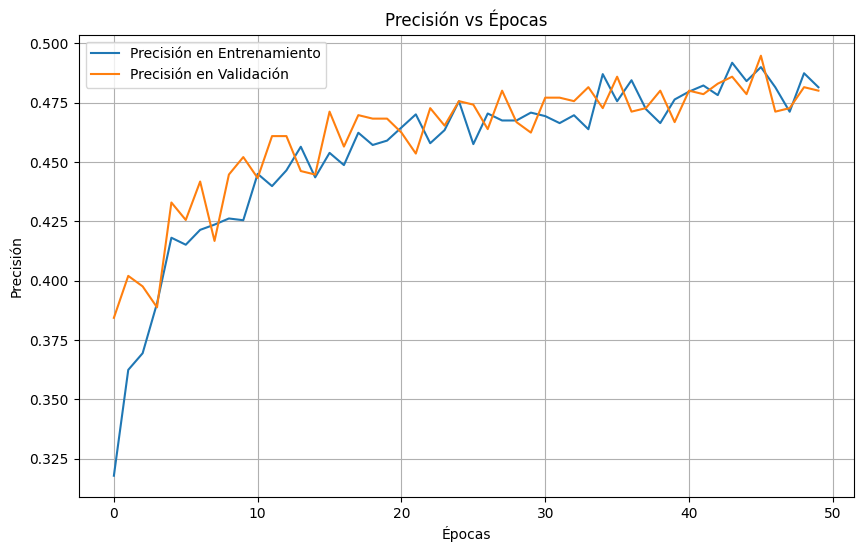

In [224]:
# Evaluar en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nPérdida en el conjunto de prueba: {test_loss}")
print(f"Precisión en el conjunto de prueba: {test_accuracy}")

# Graficar accuracy vs. épocas
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Precisión en Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Precisión vs Épocas')
plt.legend()
plt.grid(True)
plt.show()


In [225]:
# Guardar el modelo entrenado
model.save("/content/NN_clasficacion_6.h5")
print("Modelo guardado en: /content/NN_clasficacion_6.h5")


Modelo guardado en: /content/NN_clasficacion_6.h5


# SOLO RESISTENCIA AL TIZON

In [226]:
# Leer el archivo de características
caracteristicas_path = "/content/TABLA_GLOBAL/Variedad_a_Caracteristicas.csv"
caracteristicas_df = pd.read_csv(caracteristicas_path, sep=';', encoding='latin1')

# Mostrar nombres de columnas
print("Nombres de las columnas en la tabla de características:")
print(caracteristicas_df.columns)


Nombres de las columnas en la tabla de características:
Index(['ï»¿Variety', 'Late blight (LB)', 'Predominant tuber skin color',
       'Predominant tuber flesh color', 'General tuber shape',
       'Tuber shape depth of eyes', 'Dry matter (%)',
       'Growing period highland'],
      dtype='object')


In [231]:
# Limpiar nombres de columnas para eliminar caracteres especiales
caracteristicas_df.columns = caracteristicas_df.columns.str.strip().str.replace('ï»¿', '')

# Verificar los nombres corregidos
print("Nombres de columnas después de la limpieza:")
print(caracteristicas_df.columns)
tabla_base['PRODUCTO'].unique()


Nombres de columnas después de la limpieza:
Index(['Variety', 'Late blight (LB)', 'Predominant tuber skin color',
       'Predominant tuber flesh color', 'General tuber shape',
       'Tuber shape depth of eyes', 'Dry matter (%)',
       'Growing period highland'],
      dtype='object')


array(['Amarilis-INIA', 'Yungay', 'Huayro', 'Canchan-INIA', 'Perricholi',
       'UNICA'], dtype=object)

In [232]:
# Crear un diccionario de variedades y su resistencia
resistencia_mapping = {'R': 3, 'MR': 2, 'S': 1, 'HS': 0}

# Seleccionar las columnas relevantes
variedades_resistencia = caracteristicas_df[['Variety', 'Late blight (LB)']].copy()
variedades_resistencia['Late blight (LB)'] = variedades_resistencia['Late blight (LB)'].map(resistencia_mapping)

# Renombrar columnas para unir con la tabla base
variedades_resistencia.rename(columns={'Variety': 'PRODUCTO', 'Late blight (LB)': 'RESISTENCIA'}, inplace=True)

# Unir la resistencia con la tabla base
tabla_base = tabla_base.merge(variedades_resistencia, how='left', on='PRODUCTO')

# Verificar la tabla actualizada
print("Primeras filas de la tabla con resistencia:")
print(tabla_base[['PRODUCTO', 'RESISTENCIA']].drop_duplicates().head())


Primeras filas de la tabla con resistencia:
          PRODUCTO  RESISTENCIA
0    Amarilis-INIA            2
2           Yungay            3
3           Huayro            2
136   Canchan-INIA            2
303     Perricholi            2


In [122]:
caracteristicas_df

,Variety,Late blight (LB),Predominant tuber skin color,Predominant tuber flesh color,General tuber shape,Tuber shape depth of eyes,Dry matter (%),Growing period highland
0,Perricholi,MR,White,Cream,Oblong tubers,Slightly deep eye,19.0,M
1,Canchan-INIA,MR,Red,Pale Yellow,Rounded tubers,Slightly deep eye,23.0,L
2,Amarilis-INIA,MR,White,Pale Yellow,Rounded tubers,Shallow eyes,21.0,M
3,UNICA,S,Red,Cream,Oblong tubers,Shallow eyes,21.0,M
4,Yungay,R,NaN,NaN,NaN,NaN,NaN,NaN
5,Huayro,MR,NaN,NaN,NaN,NaN,NaN,NaN
